In [175]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [87]:
def tumor_growth(initial, a, b, t):
    c = np.log(np.log(initial * b))
    return np.exp(np.exp(-a*t + c)) / b

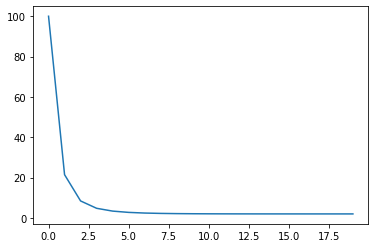

In [111]:
tumor_model_1 = []
for i in range(20):
    tumor_model_1.append(tumor_growth(100, 0.5, 0.5, i))
plt.plot(list(range(0, 20)), tumor_model_1)

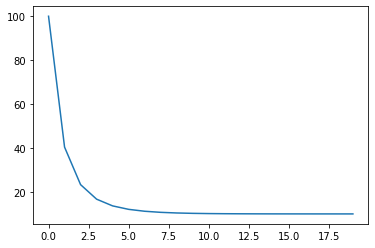

In [112]:
tumor_model_2 = []
for i in range(20):
    tumor_model_2.append(tumor_growth(100, 0.5, 0.1, i))
plt.plot(list(range(0, 20)), tumor_model_2)

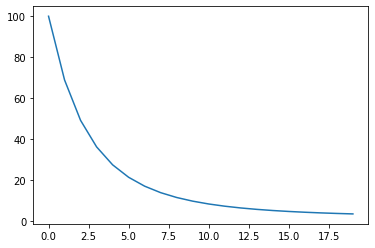

In [132]:
tumor_model_3 = []
for i in range(20):
    tumor_model_3.append(tumor_growth(100, 0.1, 0.5, i))
plt.plot(list(range(0, 20)), tumor_model_3)


In [134]:
J1 = np.array([[0.15, 0], [0, 0.2]])
np.linalg.eig(J1)

(array([0.15, 0.2 ]),
 array([[1., 0.],
        [0., 1.]]))

In [151]:
def find_eig(x, y):
    M = np.array([[0.15 - 0.02 * x - 0.03 * y, -0.03 * x], [-0.04 * y, 0.2-0.04 * x-0.04 * y]])
    print(M)
    return np.linalg.eig(M)

In [152]:
find_eig(0, 0)

[[ 0.15 -0.  ]
 [-0.    0.2 ]]


(array([0.15, 0.2 ]),
 array([[1., 0.],
        [0., 1.]]))

In [153]:
find_eig(0, 10)

[[-0.15 -0.  ]
 [-0.4  -0.2 ]]


(array([-0.2 , -0.15]),
 array([[ 0.        ,  0.12403473],
        [ 1.        , -0.99227788]]))

In [154]:
find_eig(15, 0)

[[-0.15 -0.45]
 [-0.   -0.4 ]]


(array([-0.15, -0.4 ]),
 array([[1.        , 0.87415728],
        [0.        , 0.48564293]]))

In [155]:
find_eig(3, 4)

[[-0.03 -0.09]
 [-0.16 -0.08]]


(array([ 0.06757651, -0.17757651]),
 array([[ 0.6779928 ,  0.52066784],
        [-0.73506854,  0.85375934]]))

In [183]:
def f(t, state):
    X, Y = state
    X_prime = 0.15 * X - 0.01 * X**2 - 0.03 * X * Y
    Y_prime = 0.2 * Y - 0.04 * X * Y - 0.02 * Y**2
    return (X_prime, Y_prime)

/var/folders/z1/w0_g_zvs0jxbkxqty0qpwryh0000gn/T/ipykernel_49439/2817407114.py:8: RuntimeWarning: invalid value encountered in true_divide
  dxu = dx/np.sqrt(dx ** 2 + dy ** 2)
/var/folders/z1/w0_g_zvs0jxbkxqty0qpwryh0000gn/T/ipykernel_49439/2817407114.py:9: RuntimeWarning: invalid value encountered in true_divide
  dyu = dy/np.sqrt(dx ** 2 + dy ** 2)


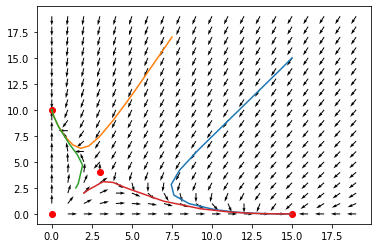

In [184]:
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)
X, Y = np.meshgrid(x, y)

dx = 0.15 * X - 0.01 * X**2 - 0.03 * X * Y
dy = 0.2 * Y - 0.04 * X * Y - 0.02 * Y**2

dxu = dx/np.sqrt(dx ** 2 + dy ** 2)
dyu = dy/np.sqrt(dx ** 2 + dy ** 2)

x_fixed = np.array([0, 0, 15, 3])
y_fixed = np.array([0, 10, 0, 4])


t_interval = (0, 1000)
initial_state = (15, 15)
solution = solve_ivp(f, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (7.5, 17)
solution = solve_ivp(f, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (1.5, 2.5)
solution = solve_ivp(f, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (2, 2)
solution = solve_ivp(f, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

plt.quiver(X, Y, dxu, dyu, color = "k")
plt.scatter(x_fixed, y_fixed, color = "r")
plt.show()

In [186]:
def f2(t, state):
    X, Y = state
    X_prime = 0.1 * X - 0.01 * X**2 - 0.005 * X * Y
    Y_prime = 0.2 * Y - 0.005 * X * Y - 0.04 * Y**2
    return (X_prime, Y_prime)

/var/folders/z1/w0_g_zvs0jxbkxqty0qpwryh0000gn/T/ipykernel_49439/363428123.py:8: RuntimeWarning: invalid value encountered in true_divide
  dxu = dx/np.sqrt(dx ** 2 + dy ** 2)
/var/folders/z1/w0_g_zvs0jxbkxqty0qpwryh0000gn/T/ipykernel_49439/363428123.py:9: RuntimeWarning: invalid value encountered in true_divide
  dyu = dy/np.sqrt(dx ** 2 + dy ** 2)


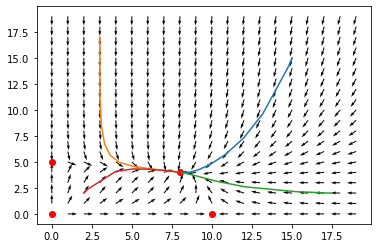

In [192]:
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)
X, Y = np.meshgrid(x, y)

dx = 0.1 * X - 0.01 * X**2 - 0.005 * X * Y
dy = 0.2 * Y - 0.005 * X * Y - 0.04 * Y**2

dxu = dx/np.sqrt(dx ** 2 + dy ** 2)
dyu = dy/np.sqrt(dx ** 2 + dy ** 2)

x_fixed2 = np.array([0, 0, 10, 8])
y_fixed2 = np.array([0, 5, 0, 4])


t_interval = (0, 1000)
initial_state = (15, 15)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (3, 17)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (17.5, 2)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (2, 2)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

plt.quiver(X, Y, dxu, dyu, color = "k")
plt.scatter(x_fixed2, y_fixed2, color = "r")
plt.show()

In [194]:
def find_eig2(x, y):
    M = np.array([[0.1 - 0.02 * x - 0.005 * y, -0.005 * x], [-0.005 * y, 0.2 - 0.005 * x - 0.08 * y]])
    print(M)
    return np.linalg.eig(M)

In [195]:
find_eig2(0,0)

[[ 0.1 -0. ]
 [-0.   0.2]]


(array([0.1, 0.2]),
 array([[1., 0.],
        [0., 1.]]))

In [196]:
find_eig2(0,5)

[[ 0.075 -0.   ]
 [-0.025 -0.2  ]]


(array([-0.2  ,  0.075]),
 array([[ 0.        ,  0.99589321],
        [ 1.        , -0.09053575]]))

In [197]:
find_eig2(10,0)

[[-0.1  -0.05]
 [-0.    0.15]]


(array([-0.1 ,  0.15]),
 array([[ 1.        , -0.19611614],
        [ 0.        ,  0.98058068]]))

In [198]:
find_eig2(8,4)

[[-0.08 -0.04]
 [-0.02 -0.16]]


(array([-0.07101021, -0.16898979]),
 array([[ 0.97566304,  0.40997761],
        [-0.21927526,  0.91209559]]))

(array([ 1., -1.]),
 array([[1., 0.],
        [0., 1.]]))

In [234]:
def f3(t, state):
    X, Y = state
    X_prime = 2 * X -  X**2 - 0.5 * X * Y
    Y_prime = X * Y - Y
    return (X_prime, Y_prime)

/var/folders/z1/w0_g_zvs0jxbkxqty0qpwryh0000gn/T/ipykernel_49439/1037673824.py:8: RuntimeWarning: invalid value encountered in true_divide
  dxu = dx/np.sqrt(dx ** 2 + dy ** 2)
/var/folders/z1/w0_g_zvs0jxbkxqty0qpwryh0000gn/T/ipykernel_49439/1037673824.py:9: RuntimeWarning: invalid value encountered in true_divide
  dyu = dy/np.sqrt(dx ** 2 + dy ** 2)


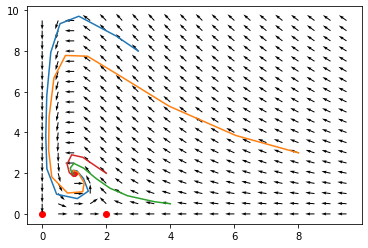

In [236]:
x = np.arange(0, 10, 0.5)
y = np.arange(0, 10, 0.5)
X, Y = np.meshgrid(x, y)

dx = 2 * X -  X**2 - 0.5 * X * Y
dy = X * Y - Y

dxu = dx/np.sqrt(dx ** 2 + dy ** 2)
dyu = dy/np.sqrt(dx ** 2 + dy ** 2)

t_interval = (0, 1000)
initial_state = (3, 8)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (8, 3)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (4, 0.5)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (2, 2)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

x_fixed3 = [0, 2, 1]
y_fixed3 = [0, 0, 2]

plt.scatter(x_fixed3, y_fixed3, color = "r")
plt.quiver(X, Y, dxu, dyu, color = "k")

In [261]:
def f4(t, state):
    X, Y = state
    X_prime = 2 * X -  X**2 - 0.5 * X * Y
    Y_prime = 2 * X * Y + Y - 0.5 * Y**2
    return (X_prime, Y_prime)

/var/folders/z1/w0_g_zvs0jxbkxqty0qpwryh0000gn/T/ipykernel_49439/1160467566.py:8: RuntimeWarning: invalid value encountered in true_divide
  dxu = dx/np.sqrt(dx ** 2 + dy ** 2)
/var/folders/z1/w0_g_zvs0jxbkxqty0qpwryh0000gn/T/ipykernel_49439/1160467566.py:9: RuntimeWarning: invalid value encountered in true_divide
  dyu = dy/np.sqrt(dx ** 2 + dy ** 2)


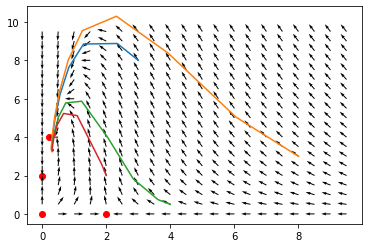

In [265]:
x = np.arange(0, 10, 0.5)
y = np.arange(0, 10, 0.5)
X, Y = np.meshgrid(x, y)

dx = 2 * X -  X**2 - 0.5 * X * Y
dy = 2 * X * Y + Y - 0.5 * Y**2

dxu = dx/np.sqrt(dx ** 2 + dy ** 2)
dyu = dy/np.sqrt(dx ** 2 + dy ** 2)

t_interval = (0, 1000)
initial_state = (3, 8)
solution = solve_ivp(f4, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (8, 3)
solution = solve_ivp(f4, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (4, 0.5)
solution = solve_ivp(f4, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

initial_state = (2, 2)
solution = solve_ivp(f4, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

x_fixed4 = [0, 0, 2, 1/5]
y_fixed4 = [0, 2, 0, 4]

plt.scatter(x_fixed4, y_fixed4, color = "r")
plt.quiver(X, Y, dxu, dyu, color = "k")